In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv("C:/Users/HP/Downloads/sms+spam+collection/SMSSpamCollection",sep="\t",names=['labels','msg'])

In [3]:
dataset

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.isnull().sum()

labels    0
msg       0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset['labels'] = dataset['labels'].map({'ham':0,
                                        'spam':1})

In [7]:
dataset

,labels,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
dataset.describe()

,labels
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

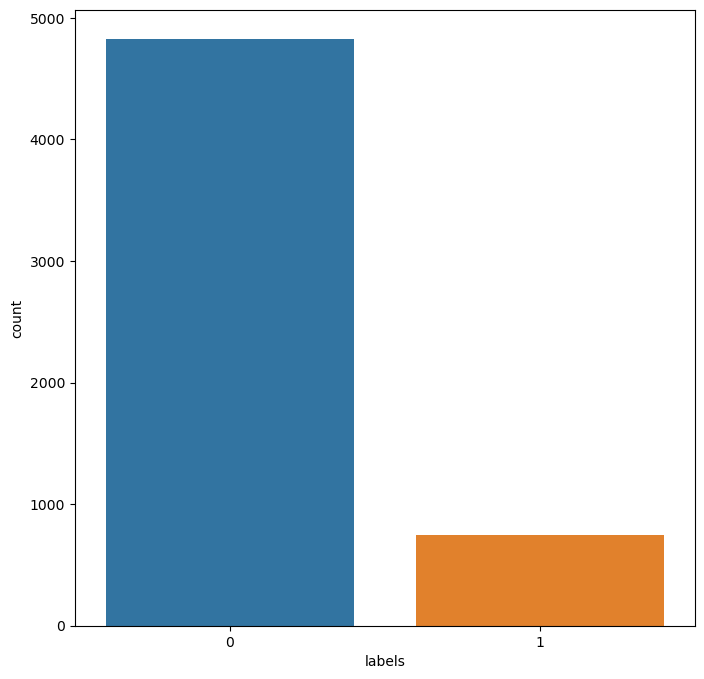

In [10]:
plt.figure(figsize=(8,8))
p=sns.countplot(x='labels',data=dataset)

In [11]:
only_spam=dataset[dataset['labels']==1]
len(only_spam)

747

In [12]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [13]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])

Text(0, 0.5, 'count ')

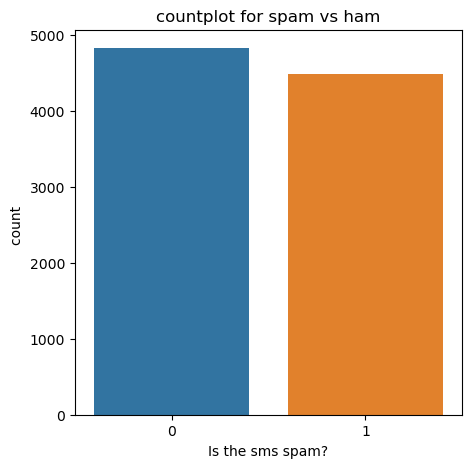

In [14]:
plt.figure(figsize=(5,5))
g=sns.countplot(x='labels',data=dataset)
plt.title("countplot for spam vs ham")
plt.xlabel("Is the sms spam?")
plt.ylabel("count ")

In [15]:
dataset

,labels,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [16]:
dataset=dataset.reset_index()

In [17]:
dataset

,index,labels,msg
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [18]:
dataset.drop('index',axis=1)

,labels,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
9302,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
dataset['word_count']=dataset['msg'].apply(lambda x:len(x.split()))

In [20]:
dataset

,index,labels,msg,word_count
0,0,0,"Go until jurong point, crazy.. Available only ...",20
1,1,0,Ok lar... Joking wif u oni...,6
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,3,0,U dun say so early hor... U c already then say...,11
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


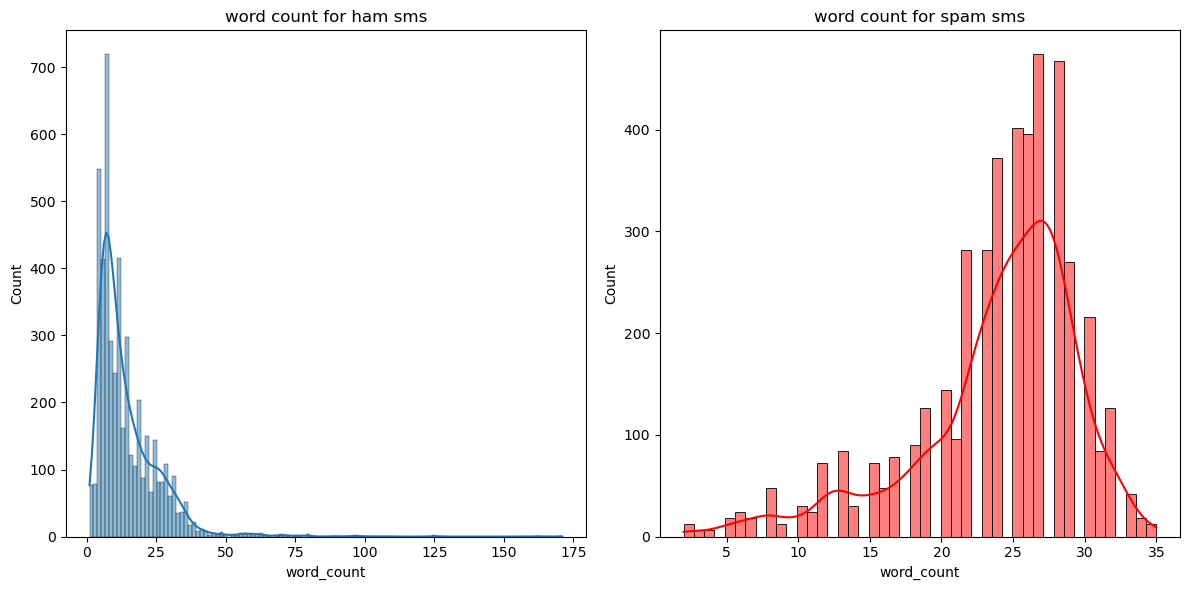

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["labels"]==0].word_count, kde=True)
plt.title("word count for ham sms")
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["labels"]==1].word_count, kde=True,color="red")
plt.title("word count for spam sms")
plt.tight_layout()
plt.show()

In [22]:
#creting new feature containing corrency symbol or not
def currency(data):
    currency_symbols=["$","€","£","฿","₹"]
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [23]:
dataset["contains_currency_symbol"]=dataset["msg"].apply(currency)

In [24]:
dataset

,index,labels,msg,word_count,contains_currency_symbol
0,0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,1,0,Ok lar... Joking wif u oni...,6,0
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,3,0,U dun say so early hor... U c already then say...,11,0
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


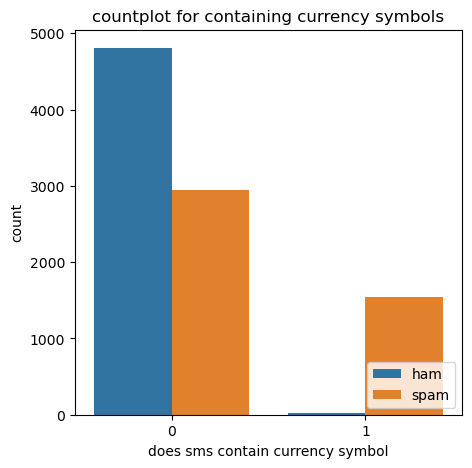

In [25]:
#creating count plot for currency symbols 
plt.figure(figsize=(5,5))
g=sns.countplot(x='contains_currency_symbol',data=dataset,hue="labels")
plt.title("countplot for containing currency symbols")
plt.xlabel("does sms contain currency symbol")
plt.ylabel("count")
plt.legend(labels=["ham","spam"],loc=4)

In [26]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [27]:
dataset['contains_number']=dataset['msg'].apply(number)

In [28]:
dataset

,index,labels,msg,word_count,contains_currency_symbol,contains_number
0,0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,1,0,Ok lar... Joking wif u oni...,6,0,0
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,3,0,U dun say so early hor... U c already then say...,11,0,0
4,4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


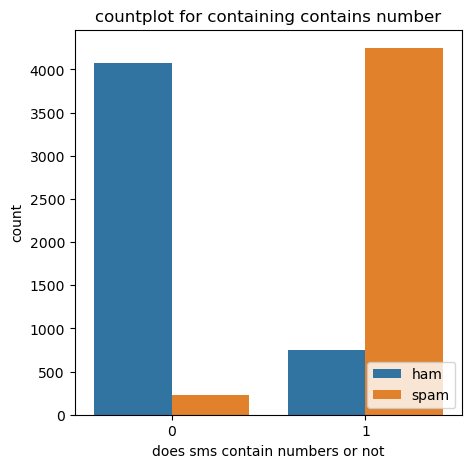

In [29]:
#count plot for containing numbers and letters 
plt.figure(figsize=(5,5))
g=sns.countplot(x='contains_number',data=dataset,hue="labels")
plt.title("countplot for containing contains number")
plt.xlabel("does sms contain numbers or not")
plt.ylabel("count")
plt.legend(labels=["ham","spam"],loc=4)

# Datapreprosessing

In [30]:
import nltk
import re
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
corpus = []
wn1= WordNetLemmatizer()

In [32]:
for sms in dataset.msg:
    msg = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)  # Clean special characters in the message
    msg = msg.lower()
    words = msg.split()
    lemm_words = [wn1.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]  # Lemmatize the filtered words
    msg = ' '.join(lemm_words)
    corpus.append(msg)

In [33]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [34]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [35]:
x=pd.DataFrame(vectors , columns=feature_names)
y=dataset['labels']

In [37]:
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [38]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [46]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

ValueError: y should be a 1d array, got an array of shape (1862, 500) instead.